In [66]:
# Data Science packages
import pandas as pd
import numpy as np

# Text Analysis packages
import nltk
import nltk.corpus
from gensim.models import Word2Vec 

# Web Scraping Packages
import requests
import requests_cache 
import lxml.html as lx
import re
from datetime import datetime
import time 

# Graphing packages
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import *

# Interactive plot packages
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# Clustering packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

In [25]:
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")
    
key = read_key("../keys/plotly_key.txt")

plotly.tools.set_credentials_file(username = 'aialba', api_key = key)

## Distribution of Income

## Webscraping Reddit

In [2]:
import requests
import requests_cache 
import lxml.html as lx
import re
from datetime import datetime

requests_cache.install_cache("reddit_cache2")

In [3]:
# https://www.reddit.com/r/redditdev/comments/3qbll8/429_too_many_requests/cwe2yay?utm_source=share&utm_medium=web2x
response = requests.get("https://old.reddit.com/r/depression/comments/anh7tv/regular_checkin_post/?limit=500",
                        headers = {'User-agent': 'your bot 0.1'})
response.raise_for_status



<bound method Response.raise_for_status of <Response [200]>>

In [4]:
html = lx.fromstring(response.text)

comment_block = html.xpath("//div[@class = 'sitetable nestedlisting']")[0]
len(comment_block) # gets all the comment blocks

comment_block[0][3] # goes into the [/div[@class = 'entry unvoted']]

<Element div at 0x1c28b2af48>

In [6]:
e = comment_block[0].find_class('entry unvoted')[0]

e[0] # goes into p[@class = 'tagline']
print(e[0][1].get('href')) # userurl
print(e[0][3].get('title')) # dislikes
print(e[0][5].get('title')) # likes
print(e[0][6].get('datetime')) # dislikes

print(e[1]) # goes into comment
print(e[1][1][0]) # goes into //div[@class = 'usertext-body may-blank-within md-container ']/div
print(e[1][1][0][0].text) # gets the time

https://old.reddit.com/user/KMoneySupreme
0
2
2019-05-09T00:03:14+00:00
<Element form at 0x1c28e96e58>
<Element div at 0x1c28e96e58>
I’m really struggling. I’m pretty convinced no one likes me so I don’t talk to anyone, at least not in a real way. I’m afraid of losing my job, and completely unsure how valid of a feeling that is. I don’t want to talk to my so because I’ve been there before and he will tell me everyone has problems. I’m just lost and exhausted.


In [4]:
def get_comment(e):
    try:
        comment =  ''.join([i.text + '\n' for i in e])
    except:
        comment = ''
    
    return comment

def get_comment_info(element):
    try:
        e = element.find_class('entry unvoted')[0]
        user_url = e[0][1].get('href')
        user_name = re.sub('https://old.reddit.com/user/', '', user_url)
        comment_dislikes = e[0][3].get('title')
        comment_likes = e[0][5].get('title')
        comment_time = e[0][6].get('datetime')
        comment = get_comment(e[1][1][0])

        return {"user_name": user_name, "user_url": user_url, "comment": comment, "time": comment_time,
                "likes": comment_likes, "dislikes": comment_dislikes}
    except:
        return {"user_name": None,"user_url": None, "comment": None, "time": None,
                "likes": None, "dislikes": None}
    

In [7]:
# since every even entry is meaningless
odd_comment_block = [comment_block[i] for i in np.arange(0,len(comment_block)) if i % 2 == 0]
odd_comment_block = odd_comment_block[:len(odd_comment_block) - 1]

df = pd.DataFrame([get_comment_info(x) for x in odd_comment_block])
df.head(5)

,comment,dislikes,likes,time,user_name,user_url
0,I feel so stupid today. Everything I'm saying ...,1,3,2019-05-26T21:57:00+00:00,PublicAccessTVShow,https://old.reddit.com/user/PublicAccessTVShow
1,I made myself something to eat and I'm catchin...,1,3,2019-05-26T21:53:40+00:00,temporary_nostalgia,https://old.reddit.com/user/temporary_nostalgia
2,I had to spend 5 days in jail to get a dui cha...,1,3,2019-05-26T21:09:45+00:00,Cyrakks,https://old.reddit.com/user/Cyrakks
3,just lonely. whenever i'm lonely i think about...,2,4,2019-05-26T20:42:31+00:00,danceralex,https://old.reddit.com/user/danceralex
4,I don’t want to do life anymore. I wish there ...,1,3,2019-05-26T20:23:26+00:00,prianna826,https://old.reddit.com/user/prianna826


In [5]:
def df_from_url(url):
    response = requests.get(url, headers = {'User-agent': 'your bot 0.1'})
    response.raise_for_status
    html = lx.fromstring(response.text)
    comment_block = html.xpath("//div[@class = 'sitetable nestedlisting']")[0]
    odd_comment_block = [comment_block[i] for i in np.arange(0,len(comment_block)) if i % 2 == 0]
    odd_comment_block = odd_comment_block[:len(odd_comment_block) - 1]
    df = pd.DataFrame([get_comment_info(x) for x in odd_comment_block])
    
    return df


In [6]:
urls = [
    'https://old.reddit.com/r/depression/comments/anh7tv/regular_checkin_post/',
    'https://old.reddit.com/r/depression/comments/95ezhs/regular_checkin_post/',
    'https://old.reddit.com/r/depression/comments/6swsuk/regular_checkin_and_some_info_about_highrisk_posts/',
    'https://old.reddit.com/r/depression/comments/6lfjbt/regular_checkin_plus_fyi_about_why_we_dont_allow/',
    'https://old.reddit.com/r/depression/comments/6a7gb9/rdepression_lets_check_in/',
    'https://old.reddit.com/r/depression/comments/6fx6lt/hi_rdepression_lets_check_in/',
    'https://old.reddit.com/r/depression/comments/6ju4xs/lets_check_in_tell_us_how_youre_doing_share_an/'
]

urls_new = [url + '?limit=500' for url in urls]
urls_old = [url + '?sort=old&limit=500' for url in urls[1:]]
urls_top =  [url + '?sort=top&limit=500' for url in urls[2:]]
urls_con = [url + '?sort=controversial&limit=500' for url in urls[2:]]

urls = urls_new + urls_old + urls_top + urls_con

In [7]:
def scrape_reddit(urls):
    reddit_df = df_from_url(urls[0])
    for url in urls[1:]:
        temp = df_from_url(url)
        reddit_df = pd.concat([reddit_df, temp])
        reddit_df = reddit_df.drop_duplicates()
    reddit_df = reddit_df.dropna()
    reddit_df = reddit_df.reset_index(drop = True)
    return reddit_df


In [8]:
start = time.time()
df = scrape_reddit(urls)
end = time.time()

print('That took ', (end - start)/60, ' minutes to complete.')

df.to_csv('checkin_comments.csv')

That took  0.1533704360326131  minutes to complete.


In [110]:
df

,comment,dislikes,likes,time,user_name,user_url
0,My life is never going to improve. I really ju...,0,2,2019-05-27T04:35:46+00:00,longshot46268,https://old.reddit.com/user/longshot46268
1,I’ve gotten to the point I hate my life. I hav...,0,2,2019-05-27T04:05:25+00:00,Jamisonf22,https://old.reddit.com/user/Jamisonf22
2,*sigh* Just in one of those low-grade depressi...,0,2,2019-05-27T01:33:26+00:00,unitedshoes,https://old.reddit.com/user/unitedshoes
3,i was just kicked out from my mother's home. d...,0,2,2019-05-27T00:58:39+00:00,2011Macro,https://old.reddit.com/user/2011Macro
4,Spoke to my former therapist a week ago. Conta...,0,2,2019-05-27T00:19:03+00:00,K4yr0,https://old.reddit.com/user/K4yr0
5,I feel like I'm drowning in my own head. I don...,1,3,2019-05-27T00:02:52+00:00,sassytheimpaler,https://old.reddit.com/user/sassytheimpaler
6,I want to scream for help but it feels so muff...,1,3,2019-05-26T22:40:21+00:00,Anonemonee,https://old.reddit.com/user/Anonemonee
7,I'm just tiered... I really just want to be ha...,1,3,2019-05-26T22:29:56+00:00,idefkam,https://old.reddit.com/user/idefkam
8,listening to VGMs from games I played a long t...,0,2,2019-05-26T22:20:51+00:00,Rinat1234567890,https://old.reddit.com/user/Rinat1234567890
9,I feel so stupid today. Everything I'm saying ...,2,4,2019-05-26T21:57:00+00:00,PublicAccessTVShow,https://old.reddit.com/user/PublicAccessTVShow


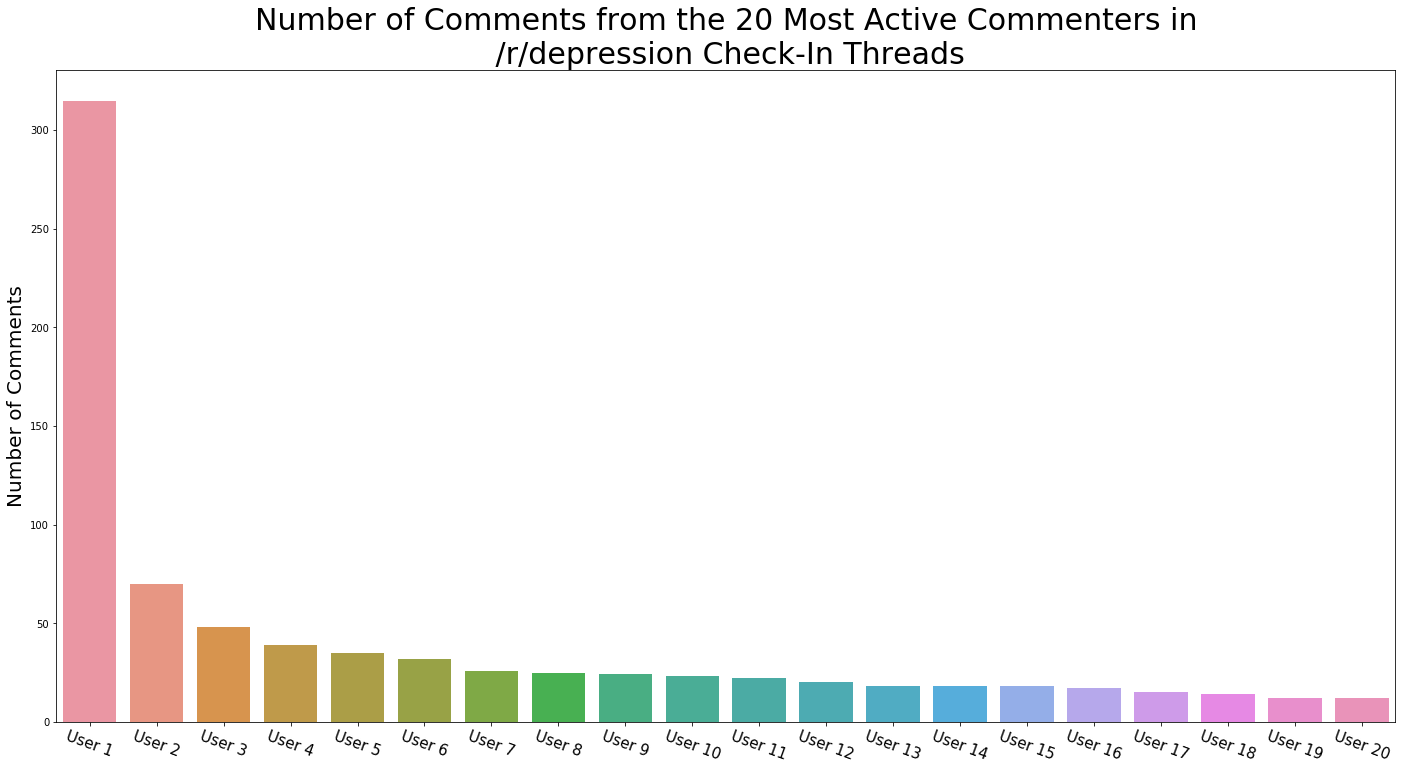

In [11]:
user_activity = pd.DataFrame(df['user_name'].value_counts())
user_activity = user_activity.reset_index()
user_activity.columns = ['Username', 'Number of Posts']
user_activity.head(20)

user_activity['Username'] = ['User ' + str(i + 1) for i in np.arange(0, len(user_activity))]

plt.figure(figsize = (24, 12))

g = sns.barplot(x = 'Username', y = 'Number of Posts', data = user_activity.head(20))
g.set_xticklabels(labels = g.get_xticklabels(), rotation = -20, fontsize = 15)
g.set_xlabel('',fontsize = 20)
g.set_ylabel('Number of Comments',fontsize = 20)
g.set_title('Number of Comments from the 20 Most Active Commenters in\n /r/depression Check-In Threads', fontsize = 30)

plt.savefig('topactiveusers.png')

We graphed the activity of users in these regular check-in threads based on how many times they posted which is pictured below. One thing to note about this graph is that not all of the comments and replies were scraped. This means that there may be large gaps in the representation of users in this graph, and that some users activity may be over or under represented based on how the sample of comments was taken.



## Word Frequencies

In [114]:
stopwords = nltk.corpus.stopwords.words("english")

comments = " ".join(df['comment'])
comments = comments.lower()
comments = re.sub("\n", ' ', comments)
comments = re.split(r'\W+', comments)
comments = [word for word in comments if word not in stopwords]

tester_fq = nltk.FreqDist(w for w in comments if w.isalnum())

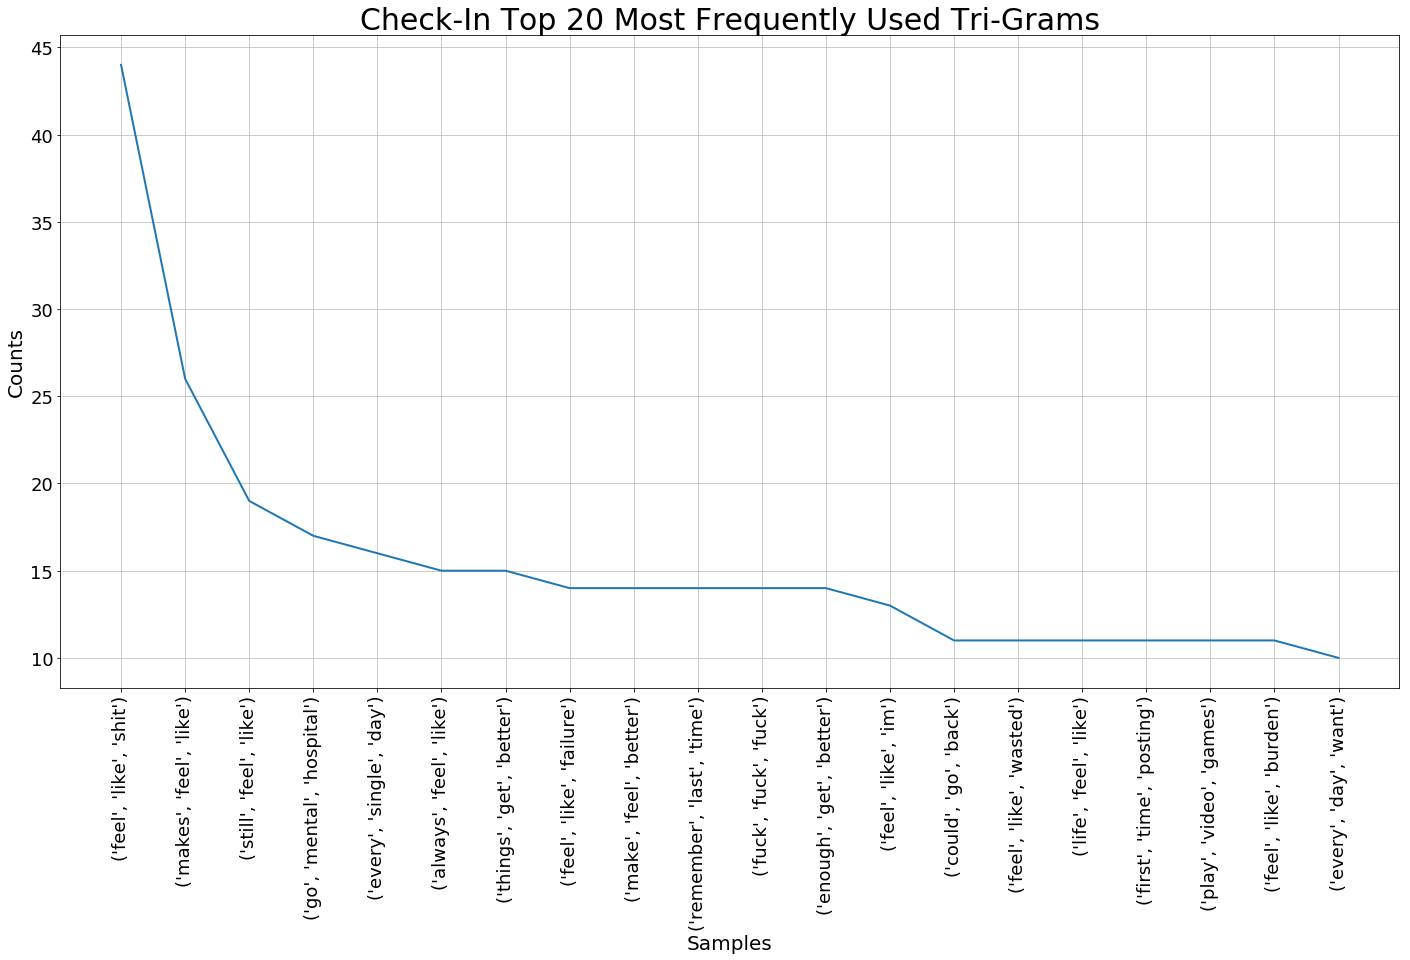

In [116]:
plt.figure(figsize = (24, 12))
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)

plt.title('Check-In Top 20 Most Frequently Used Tri-Grams', size = 30)


tgs = nltk.trigrams(comments)
fdist_tgs = nltk.FreqDist(tgs)
fdist_tgs.plot(20, cumulative = False)

We then looked at trigrams in the comments of r/depression‟s “Regular Check-In” threads (see
Supplementary Materials). We can see that commonly repeated phrases include “im sad”, “want die”, and “fuck fuck fuck”. It tells us that in general, a lot of the users who comment on these threads are struggling and
having suicidal thoughts. Phrases like “remember last time”, “want go back”, and “could go back” shows us that
many users are nostalgic and wanting to return to better times. This could be due to anything from losing a loved
one to going through a health crisis. However, there are still positive comments and signs of improvement in users. Popular phrases like “things get better” and “everything alright” show us that some users are coming back to these threads and telling us of their improvements on their mental health. This could also be users updating others to let them know that life gets better or from users trying to cheer others up as well.

## Looking into comments about therapy and therapists

In [127]:
therapy_comments = [comment for comment in df['comment'] if any(word in comment for word in therapy_words)]
len(therapy_comments)

323

In [118]:
therapy_words = ['therapy', 'psychologist', 'therapist', 'psychiatrist', 'doctor']
therapy_comments = [comment for comment in df['comment'] if any(word in comment for word in therapy_words)]

therapy_comments = " ".join(therapy_comments)
therapy_comments = therapy_comments.lower()
therapy_comments = re.sub("\n", ' ', therapy_comments)
therapy_comments = re.split(r'\W+', therapy_comments)
therapy_comments = [word for word in therapy_comments if word not in stopwords]

fqdist_therapy = nltk.FreqDist(w for w in therapy_comments if w.isalnum())

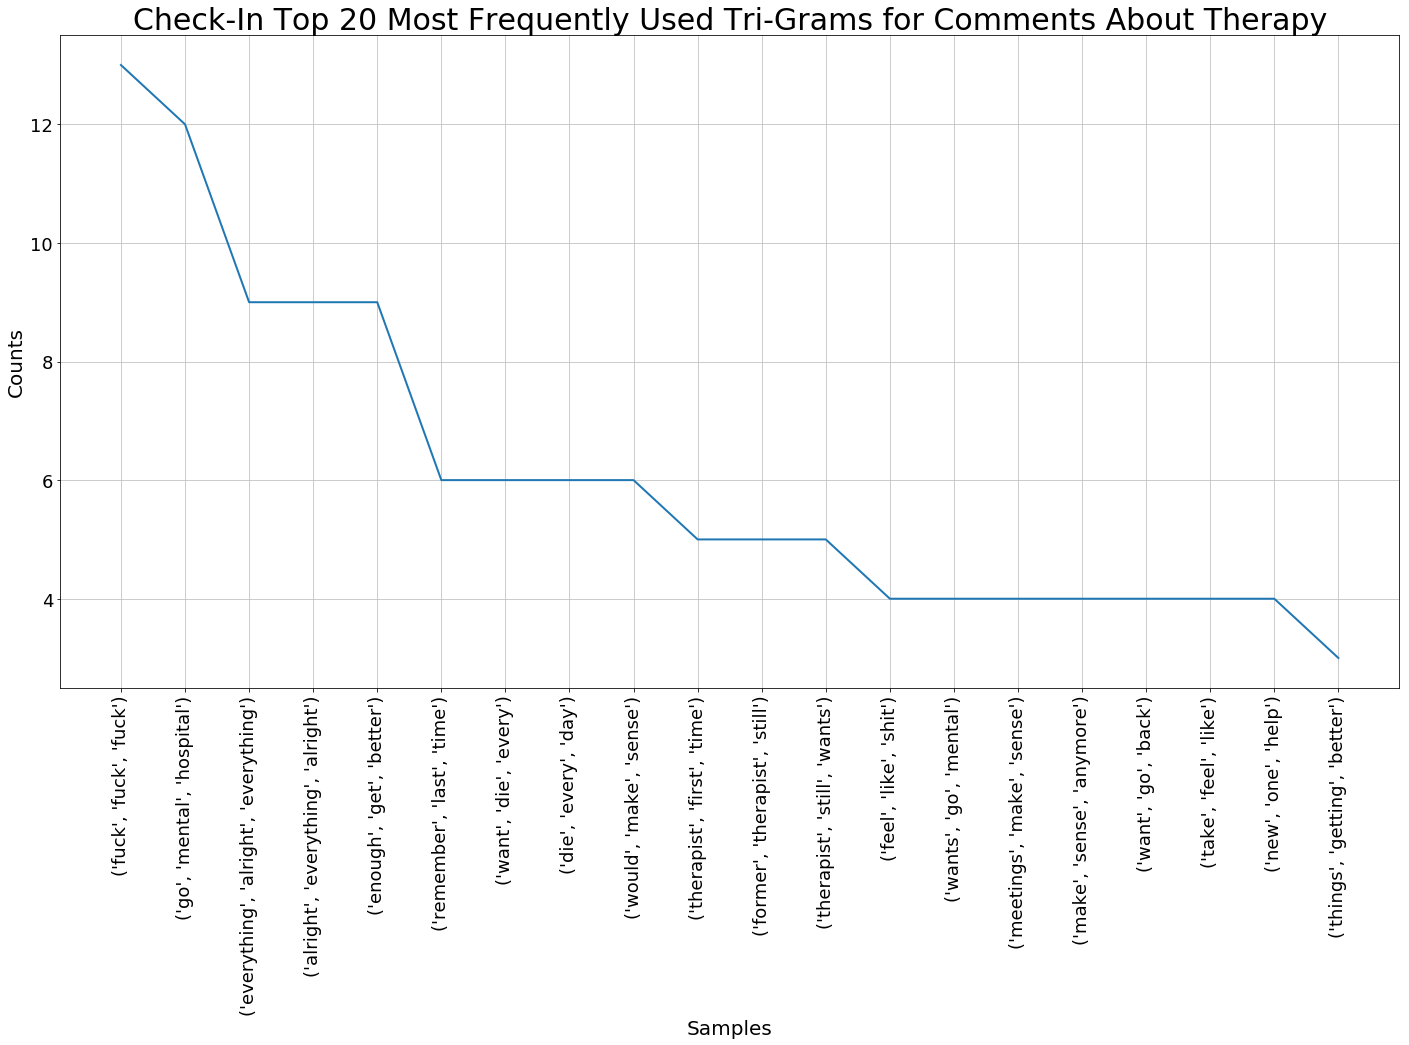

In [121]:
plt.figure(figsize = (24, 12))
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)

plt.title('Check-In Top 20 Most Frequently Used Tri-Grams for Comments About Therapy', size = 30)

tgs = nltk.trigrams(therapy_comments)
fdist_tgs = nltk.FreqDist(tgs)
fdist_tgs.plot(20, cumulative = False)

We found 323 comments pertaining to therapy in the „Check-In‟ threads. Looking at the trigrams of
comments mentioning therapy, we can notably see that commenters are being told to
go to a mental hospital by their therapist. Looking at the comments, we see that many users talk about how they
can‟t go, or don‟t want to go to a mental hospital, which is unsurprising, given the lack of freedom there.

### Medications

In [134]:
medications = ['antidepressant', 'prozac', 'lexapro', 'celexa','sarafem', 'selfemra', 'luvox',
              'paxil', 'pexeva', 'zoloft', 'trintellix', 'brintellix', 'viibyrd', 'doctor', 
              'medication', 'meds', 'drugs']
medication_comments = [comment for comment in df['comment'] if any(word in comment for word in medications)]

medication_comments = " ".join(medication_comments)
medication_comments = medication_comments.lower()
medication_comments = re.sub("\n", ' ', medication_comments)
medication_comments = re.split(r'\W+', medication_comments)
medication_comments = [word for word in medication_comments if word not in stopwords]

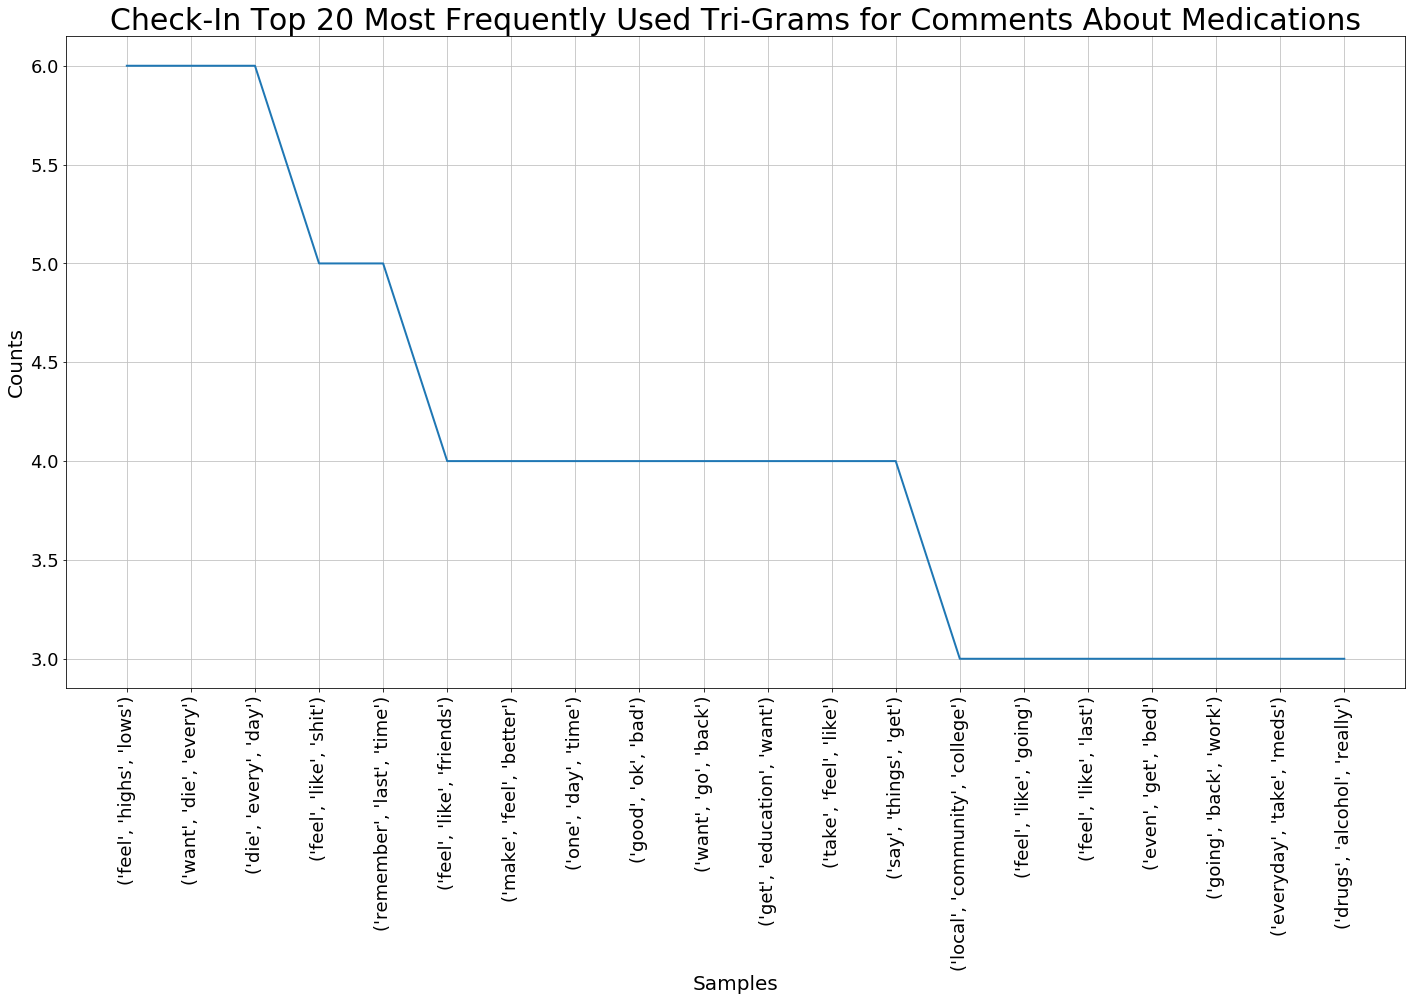

In [136]:
plt.figure(figsize = (24, 12))
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)

plt.title('Check-In Top 20 Most Frequently Used Tri-Grams for Comments About Medications', size = 30)

tgs = nltk.trigrams(medication_comments)
fdist_tgs = nltk.FreqDist(tgs)
fdist_tgs.plot(20, cumulative = False)

In [138]:
medication_comments = [comment for comment in df['comment'] if any(word in comment for word in medications)]
feels = [comment for comment in df['comment'] if 'feel like ' in comment]



When looking at comments about medication, we found 288 comments that
mentioned medication or specific medication related terms. Notice that the top comments are essentially “feel highs lows” and “want die every day” with 6 observations each telling us that medication may be ineffective or marginally effective at best for some commenters. 

## User Subreddits

In [66]:
users = df['user_url'].unique()
len(users)

1897

In [141]:
def get_users_activity_links(start_url, url_list):
    try:
        response = requests.get(start_url, headers = {'User-agent': 'your bot 0.1'})
        response.raise_for_status
        html = lx.fromstring(response.text)
        try:
            next_url = html.xpath("//span[@class = 'next-button']/a/@href")[0]
            url_list.append(next_url)

            return get_users_activity_links(next_url, url_list)
        
        except:
            try:
                next_url = html.xpath("//a[@class = 'ListingPagination__navButton', contains(text(), 'next ')]/@href")[0]
                if 'https://old.reddit.com' not in next_url:
                    next_url = 'https://old.reddit.com' + next_url

                url_list.append(next_url)

                return get_users_activity_links(next_url, url_list)
            except:  
                return url_list
    except:
        print(url_list[0])

In [142]:
def get_users_subreddits(user_start_url):
    '''
    ABOUT:
        A function that finds all the subreddits that a reddit 
        user has posted in and returns this list as a pandas
        dataframe.
    
    PARAMETERS: 
        user_start_url: a string that is a link to a reddit users activity page
    OUTPUT:
        a dataframe with two columns:
            user_name: a string of the reddit username
            subreddits: a string of the subreddits a user has posted in
    '''
    
    def foo(url):
        '''
            A nested function that finds the subreddits that a user has been active in.
        ''' 
        response = requests.get(url, headers = {'User-agent': 'your bot 0.1'})
        response.raise_for_status
        try:
            html = lx.fromstring(response.text)
            subs = html.xpath("//a[@class = 'subreddit hover']")
            subs2 = html.xpath("//a[@class = 'Post__subredditLink']")
            subs = list(set(subs+subs2))

            return subs
        except:
            return ['None I guess']
    
    url_links = get_users_activity_links(user_start_url, [user_start_url])
    
    subs = [foo(url) for url in url_links]
    subs = [item for sublist in subs for item in sublist]
    subs = [sub.text for sub in subs]
    subs = list(set(subs))
    
    sub_df = pd.DataFrame({'username':user_start_url.replace('https://old.reddit.com/user/', ''),
                           'subreddit': subs})
    
    return sub_df

    

In [143]:
get_users_activity_links(users[1231], [users[1231]])

['https://old.reddit.com/user/recycledpaper',
 'https://old.reddit.com/user/recycledpaper?count=25&after=t1_eiykclf',
 'https://old.reddit.com/user/recycledpaper?count=50&after=t1_eckyxtj',
 'https://old.reddit.com/user/recycledpaper?count=75&after=t1_e6ubgds',
 'https://old.reddit.com/user/recycledpaper?count=100&after=t1_e61uuy8',
 'https://old.reddit.com/user/recycledpaper?count=125&after=t1_e51e280',
 'https://old.reddit.com/user/recycledpaper?count=150&after=t1_e407spq',
 'https://old.reddit.com/user/recycledpaper?count=175&after=t1_e3d8b3y',
 'https://old.reddit.com/user/recycledpaper?count=200&after=t1_e2d6a7q',
 'https://old.reddit.com/user/recycledpaper?count=225&after=t1_e21zkp2',
 'https://old.reddit.com/user/recycledpaper?count=250&after=t1_e1lpovh',
 'https://old.reddit.com/user/recycledpaper?count=275&after=t1_e17wbsr',
 'https://old.reddit.com/user/recycledpaper?count=300&after=t1_e0p5q2d',
 'https://old.reddit.com/user/recycledpaper?count=325&after=t1_dzzym1b',
 'https:

In [82]:
start = time.time()
subs_df = get_users_subreddits(users[0])
for user in users[1:]:
    temp = get_users_subreddits(user)
    subs_df = pd.concat([subs_df, temp])

end = time.time()
print(end - start)
subs_df = subs_df.reset_index(drop = True)
subs_df.tail()

468.32763600349426


,username,subreddit
30716,ohmagarsh,Breath_of_the_Wild
30717,ohmagarsh,washingtondc
30718,ohmagarsh,oklahoma
30719,ohmagarsh,shameless
30720,ohmagarsh,TargetedShirts


In [83]:
subs_df.to_csv('user_subreddit2.csv')

In [62]:
start = time.time()
subs_df = get_users_subreddits(users[0])
for user in users[1:1000]:
    temp = get_users_subreddits(user)
    subs_df = pd.concat([subs_df, temp])

end = time.time()
print(end - start)
subs_df = subs_df.reset_index(drop = True)
print
subs_df.tail()

1084.5257222652435


,username,subreddit
15449,greatgriffin65,r/Archaeology
15450,greatgriffin65,r/TooAfraidToAsk
15451,jgc15903,r/fo76FilthyCasuals
15452,jgc15903,r/Market76
15453,jgc15903,r/fo76


In [64]:
start = time.time()
for user in users[1000:]:
    temp = get_users_subreddits(user)
    subs_df = pd.concat([subs_df, temp])

end = time.time()
print(end - start)
subs_df = subs_df.reset_index(drop = True)
print
subs_df.tail()

2669.2378690242767


,username,subreddit
35478,ohmagarsh,oklahoma
35479,ohmagarsh,washingtondc
35480,ohmagarsh,depression
35481,ohmagarsh,greysanatomy
35482,ohmagarsh,IDontWorkHereLady


In [147]:
subs_df = pd.read_csv('user_subreddit.csv')
subs_df['subreddit'] = [item.replace('r/', '') for item in subs_df['subreddit']]

In [148]:
subs_df['subreddit'].value_counts()

depression             1243
AskReddit               828
funny                   262
aww                     241
pics                    235
gaming                  204
Showerthoughts          199
todayilearned           172
mildlyinteresting       165
news                    164
gifs                    159
worldnews               157
SuicideWatch            154
movies                  146
videos                  142
Anxiety                 134
tifu                    114
politics                114
science                 108
LifeProTips              99
interestingasfuck        97
IAmA                     97
WTF                      96
wholesomememes           94
relationship_advice      93
relationships            93
TwoXChromosomes          92
2meirl4meirl             91
BlackPeopleTwitter       90
unpopularopinion         89
                       ... 
DiWHYNOT                  1
unimelb                   1
CrushThemAll              1
SandBoxxit                1
filmphotography     

In [149]:
defaults = '''
/r/announcements/

/r/Art/

/r/AskReddit/

/r/askscience/

/r/aww/

/r/blog/

/r/books/

/r/creepy/

/r/dataisbeautiful/

/r/DIY/

/r/Documentaries/

/r/EarthPorn/

/r/explainlikeimfive/

/r/food/

/r/funny/

/r/Futurology/

/r/gadgets/

/r/gaming/

/r/GetMotivated/

/r/gifs/

/r/history/

/r/IAmA/

/r/InternetIsBeautiful/

/r/Jokes/

/r/LifeProTips/

/r/listentothis/

/r/mildlyinteresting/

/r/movies/

/r/Music/

/r/news/

/r/nosleep/

/r/nottheonion/

/r/OldSchoolCool/

/r/personalfinance/

/r/philosophy/

/r/photoshopbattles/

/r/pics/

/r/science/

/r/Showerthoughts/

/r/space/

/r/sports/

/r/television/

/r/tifu/

/r/todayilearned/

/r/UpliftingNews/

/r/videos/

/r/worldnews/'''

defaults = defaults.replace('\n', '')
defaults = defaults.split('/r/')
defaults = defaults[1:]
defaults = [sub.replace('/','') for sub in defaults]

In [150]:
non_def_subs = [sub for sub in subs_df['subreddit'] if sub not in defaults]
non_def_subs = pd.DataFrame({'subreddit':non_def_subs})
non_def_subs['subreddit'].value_counts()
non_def_subs = pd.DataFrame(non_def_subs['subreddit'].value_counts())
non_def_subs = non_def_subs.reset_index()
non_def_subs.columns = ['Subreddit', 'Count']
non_def_subs.head()

,Subreddit,Count
0,depression,1243
1,SuicideWatch,154
2,Anxiety,134
3,politics,114
4,interestingasfuck,97


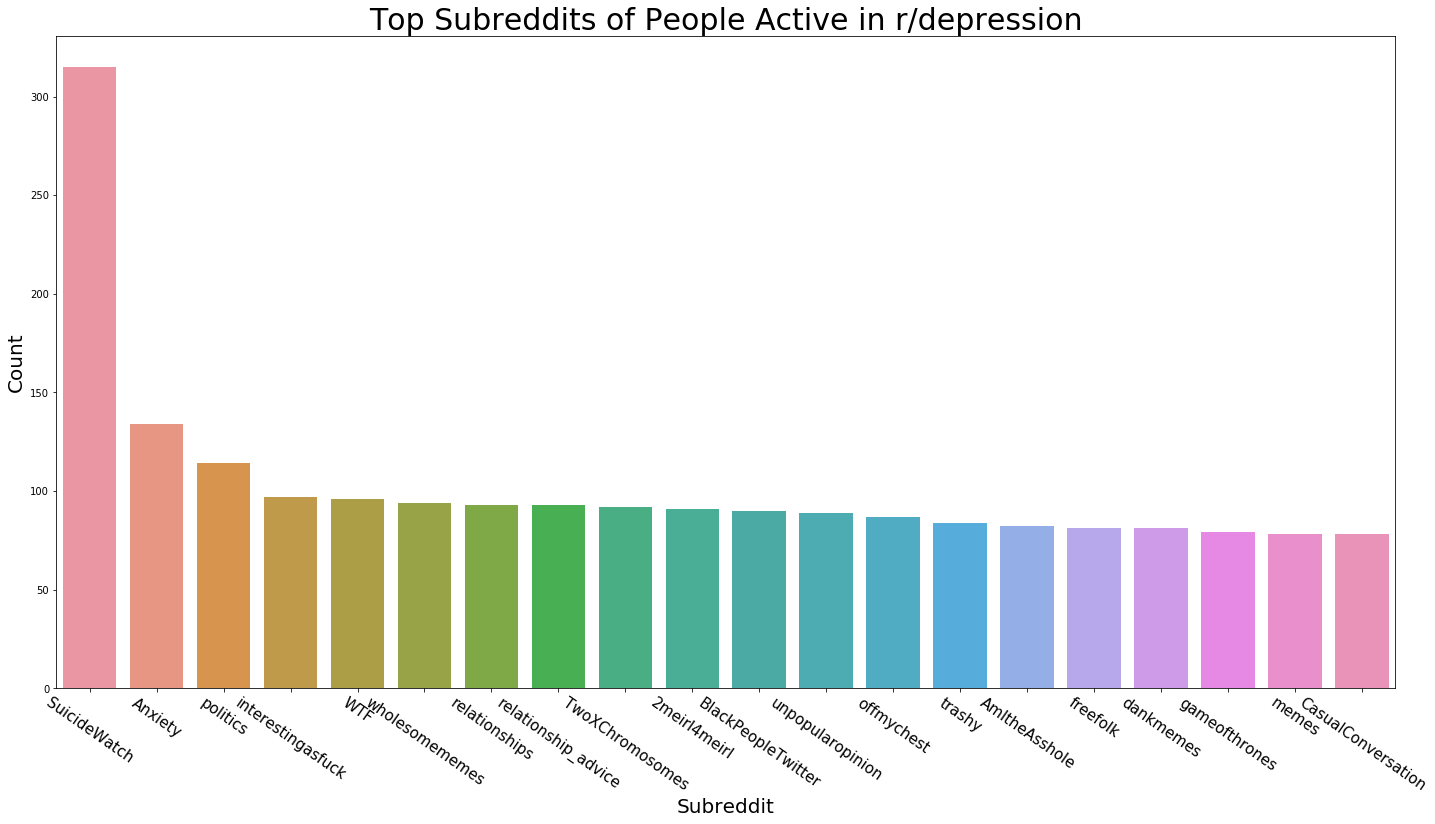

In [158]:
plt.figure(figsize = (24, 12))

g = sns.barplot(x = 'Username', y = 'Number of Posts', data = user_activity.head(20))
g.set_xticklabels(labels = g.get_xticklabels(), rotation = -35, fontsize = 15)
g.set_xlabel(g.get_xlabel(),fontsize = 20)
g.set_ylabel(g.get_xlabel(),fontsize = 20)
g.set_title('Top Subreddits of People Active in r/depression', fontsize = 30)

plot = sns.barplot(x = 'Subreddit', y = 'Count', data = non_def_subs[1:21]).get_figure()

plot.savefig("subreddit.png")

We were also interested in looking at the other subreddits that these commenters were active in. The above graph is a bar graph of how many commenters from the check-in threads are also active in each respective subreddit. Before this graph was made default subreddits, which are very broad, popular, and mainstream subreddits were removed from this listing to get a closer look at the more niche subreddits. A majority of the non-mental health related subreddits are mainly for memes and gif sharing with no particular focus on the content of the posts. We can also see that top a lot of these subreddits are depression related such as “SuicideWatch”, “Anxiety”, “RelationshipAdvice”, and “OffMyChest” amongst others. This tells us that depression and mental health issues are a big part of these commenters Reddit identity. 

However, we can also see that the counts for the activity in these subreddits are very low compared to how many unique users we were able to scrape. We gathered around 1300 unique users who commented on the regular check-in threads but were only able to get a few hundred unique users counts for these other subreddits. This low count could be an indicator that some commenters are using an alternate account for privacy so that their comments cannot be traced back to themselves. But the amount of activity in non mental health related subreddits is a sign that some commenters are using their main account to post in the /r/depression check-in threads. This is an indicator of people becoming more open about their depression since they do not feel a need to hide their mental health from their actual account.

## Looking into User who posts a lot

In [71]:
subs_df[subs_df['username'] == 'K4yr0'] 

,username,subreddit
146,K4yr0,2meirl4meirl
147,K4yr0,FriendsForDepressed
148,K4yr0,depression


In [42]:
top_user_df['comment'][130]

'All the sentences I never said to my therapist and I will never say to anyone else either:\n"I am mad at my parents for having me born"\n"This life is wrong. I am stealing the life of a person who should have existed."\n"If I could tear apart this body, I would"\n"Just because I don\'t have suicidal thoughts anymore doesn\'t means that I don\'t want to not exist"\n"I find comfort in the thought of non-existing"\n"If I had a button to undo this existence I would\'ve pushed it this winter and I wouldn\'t have regret it"\n"Suicide isn\'t attractive to me because It\'s not enough. I want to erase this whole existence"\nBut we don\'t want to get anyone in trouble, do we? Especially after almost getting forcefully committed once and therapists here being legally required to contact a doctor over suicidal thoughts.\nI learned not to talk to others about it. I guess that\'s that.\n'

In [43]:
top_user_df.tail()

,comment,dislikes,likes,time,user_name,user_url
130,All the sentences I never said to my therapist...,6,8,2017-07-01T00:58:26+00:00,K4yr0,https://old.reddit.com/user/K4yr0
131,I was on an open air festival of my town. Agai...,4,6,2017-06-30T23:56:21+00:00,K4yr0,https://old.reddit.com/user/K4yr0
132,"I can't stand when I'm feeling ""better"". It fe...",13,15,2017-06-29T07:35:37+00:00,K4yr0,https://old.reddit.com/user/K4yr0
133,"I think I'm back into ""liking"" the pains again...",2,4,2017-06-27T22:54:41+00:00,K4yr0,https://old.reddit.com/user/K4yr0
134,There's nothing worse than waking up. Waking u...,55,57,2017-06-27T17:17:01+00:00,K4yr0,https://old.reddit.com/user/K4yr0


In [26]:
top_user_comments =df_new[df_new['user_name'] == 'K4yr0']['comment']

In [28]:
top_user_comments = " ".join(top_user_comments)
top_user_comments = top_user_comments.lower()
top_user_comments = re.sub("\n", ' ', top_user_comments)
top_user_comments = re.split(r'\W+', top_user_comments)
top_user_comments = [word for word in top_user_comments if word not in stopwords]

fqdist_top = nltk.FreqDist(w for w in top_user_comments if w.isalnum())

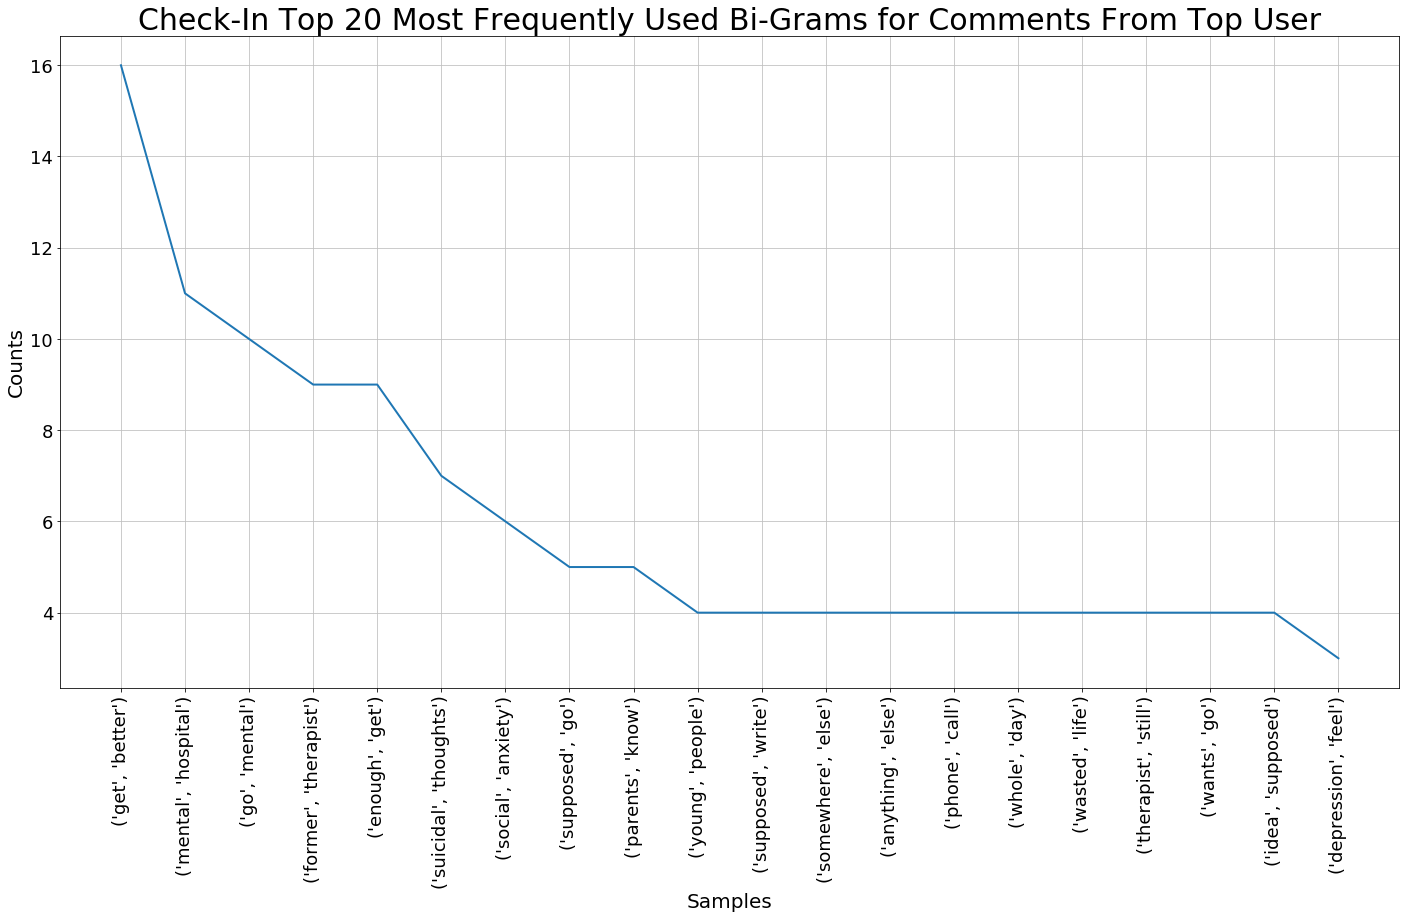

In [29]:
plt.figure(figsize = (24, 12))
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)

plt.title('Check-In Top 20 Most Frequently Used Bi-Grams for Comments From Top User', size = 30)

bgs = nltk.bigrams(top_user_comments)
fdist_bgs = nltk.FreqDist(bgs)
fdist_bgs.plot(20, cumulative = False)

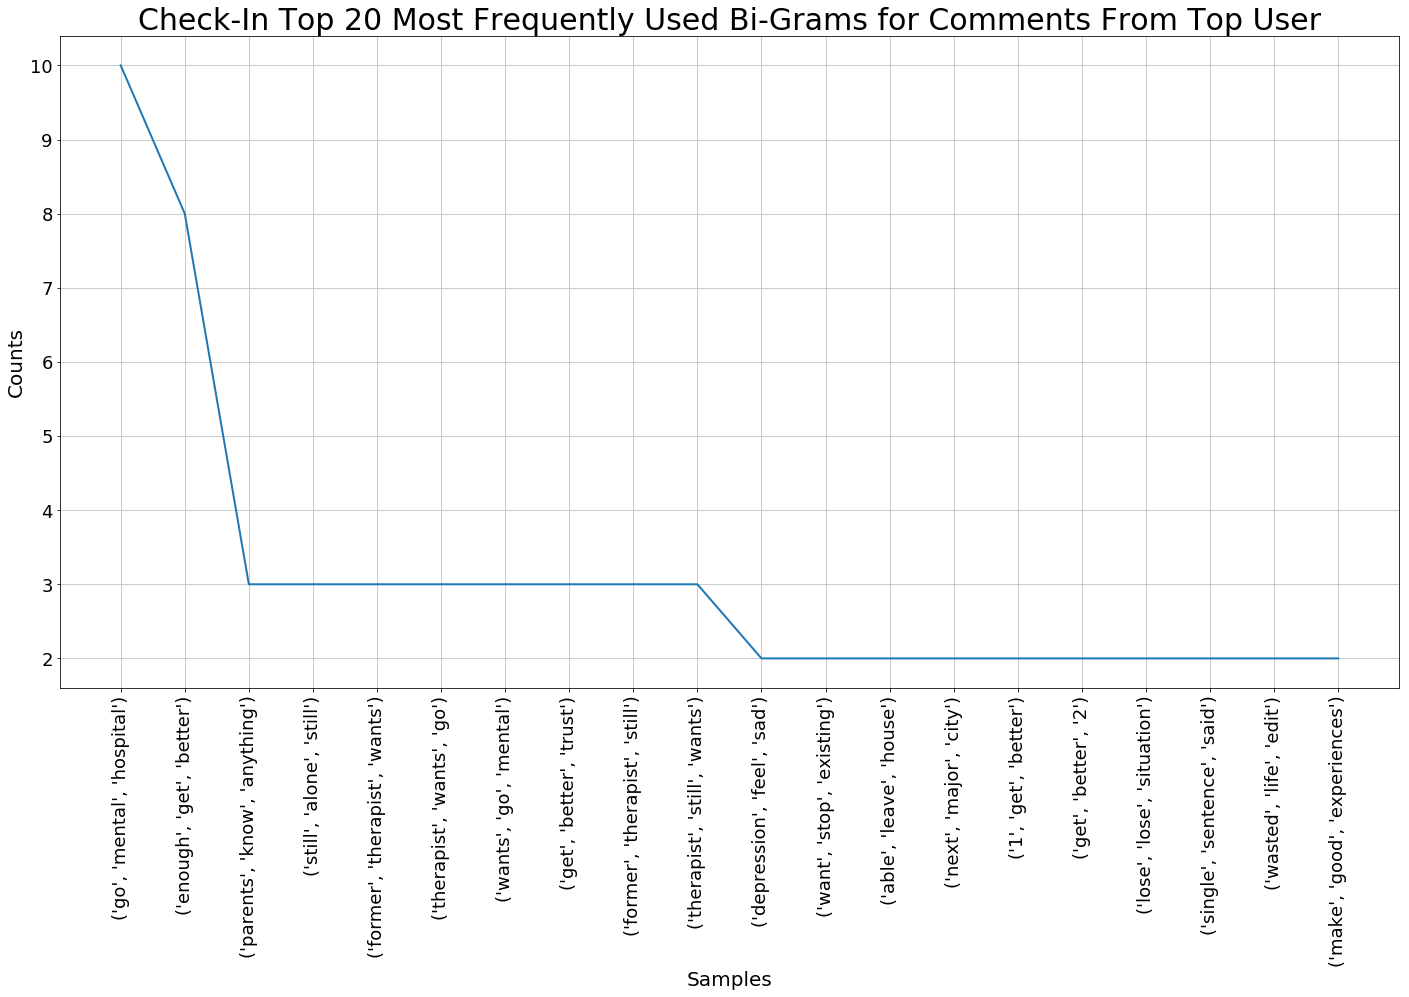

In [31]:
plt.figure(figsize = (24, 12))
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)

plt.title('Check-In Top 20 Most Frequently Used Bi-Grams for Comments From Top User', size = 30)

tgs = nltk.trigrams(top_user_comments)
fdist_tgs = nltk.FreqDist(tgs)
fdist_tgs.plot(20, cumulative = False)

In [48]:
re.split('-', top_user_df['time'][0])

'2019'

In [49]:
top_user_df['time'][0].split('T', 1)

['2019-05-26', '00:21:36+00:00']

In [54]:
time = [re.split('-', text.split('T', 1)[0]) for text in top_user_df['time']]

In [62]:
top_user_df['Year'], top_user_df['Month'], top_user_df['Day'] = year, month, day

In [64]:
top_user_df['Year-Month'] = top_user_df['Year'] + top_user_df['Month']

In [ ]:
top_user_df['Year-Month-Day'] = top_user_df['Year-Month'] + top_user_df['Day']
time_posts = pd.DataFrame(top_user_df['Year-Month-Day'].value_counts())
time_posts = time_posts.reset_index()
time_posts.columns = ['Time', 'Count']

(Analysis in Progress)

## Clustering Comments

In [9]:
from gensim.models import Word2Vec 

In [128]:
def preprocess(data):
    '''
    Credit goes to https://www.kaggle.com/gpreda/jigsaw-fast-compact-solution
    '''
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    def clean_special_chars(text, punct):
        for p in punct:
            text = text.replace(p, ' ')
        return text

    data = data.astype(str).apply(lambda x: clean_special_chars(x, punct))
    data = data.astype(str).apply(lambda x: re.sub('\n', '', x))
    data = data.astype(str).apply(lambda x: re.sub(r"\s+", ' ', x))

    return data

In [136]:
stopwords = nltk.corpus.stopwords.words("english")

comments = preprocess(df['comment'])
comments2 = [text.lower().split(' ') for text in comments]
comments2 = [[word for word in text[:-1] if word not in stopwords] for text in comments2]

In [139]:
model3 = Word2Vec(comments2, min_count = 1, size = len(df['comment']), window = 5, sg = 1) 
model3.init_sims(replace=True);
model_name = "check_in_model";
model3.save(model_name)

{'life': <gensim.models.keyedvectors.Vocab at 0x1c2bcc99e8>,
 'never': <gensim.models.keyedvectors.Vocab at 0x1c2abbec88>,
 'going': <gensim.models.keyedvectors.Vocab at 0x1c2aba0ba8>,
 'improve': <gensim.models.keyedvectors.Vocab at 0x1c2aba4400>,
 'really': <gensim.models.keyedvectors.Vocab at 0x1c2abbf828>,
 'want': <gensim.models.keyedvectors.Vocab at 0x1c2abbf3c8>,
 'many': <gensim.models.keyedvectors.Vocab at 0x1c2abbf438>,
 'wonderful': <gensim.models.keyedvectors.Vocab at 0x1c2abbf320>,
 'people': <gensim.models.keyedvectors.Vocab at 0x1c2abc0ef0>,
 'die': <gensim.models.keyedvectors.Vocab at 0x1c2abc0978>,
 'begging': <gensim.models.keyedvectors.Vocab at 0x1c2abc0390>,
 'happiness': <gensim.models.keyedvectors.Vocab at 0x1c2abc0f60>,
 'occasional': <gensim.models.keyedvectors.Vocab at 0x1c2abc10f0>,
 'blip': <gensim.models.keyedvectors.Vocab at 0x1c2abc1fd0>,
 'misery': <gensim.models.keyedvectors.Vocab at 0x1c2abc1208>,
 'remind': <gensim.models.keyedvectors.Vocab at 0x1c2abc

In [174]:
model3.wv.most_similar(positive = 'therapist', topn = 5)

[('doctor', 0.9982247352600098),
 ('community', 0.9975206851959229),
 ('meeting', 0.9973183870315552),
 ('classes', 0.99700927734375),
 ('insurance', 0.9968340396881104)]

In [175]:
model3.wv.most_similar(positive = 'medication', topn = 5)

[('paid', 0.9994380474090576),
 ('license', 0.9993641376495361),
 ('clean', 0.9992846250534058),
 ('18', 0.9992622137069702),
 ('bill', 0.9992172718048096)]

In [176]:
model3.wv.most_similar(positive = 'suicidal', topn = 5)

[('ashamed', 0.997403621673584),
 ('suffer', 0.9973476529121399),
 ('belong', 0.997193455696106),
 ('strong', 0.9971431493759155),
 ('push', 0.9970706701278687)]

In [177]:
model3.wv.most_similar(positive = 'happy', topn = 5)

[('change', 0.9925580024719238),
 ('really', 0.9904434680938721),
 ('make', 0.9901071786880493),
 ('alone', 0.9887511134147644),
 ('seems', 0.9885206818580627)]

In [178]:
model3.wv.most_similar(positive = 'depression', topn = 5)

[('self', 0.9915729761123657),
 ('issues', 0.9876673817634583),
 ('social', 0.9866926074028015),
 ('anxiety', 0.9860174655914307),
 ('illness', 0.9842232465744019)]

In [179]:
model3.wv.most_similar(positive = 'depressed', topn = 5)

[('bad', 0.9968640804290771),
 ('hard', 0.9961039423942566),
 ('still', 0.9960553646087646),
 ('really', 0.9943761825561523),
 ('numb', 0.9938111901283264)]

In [164]:
stuff = model3.wv.syn0;
stuff

/Users/Andy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).



array([[-0.01113109, -0.00163706,  0.00655202, ...,  0.00615128,
        -0.01429181,  0.00167403],
       [-0.0043169 ,  0.00205323,  0.00893881, ...,  0.00944575,
        -0.01661999,  0.00447945],
       [ 0.00254865,  0.01221198,  0.00383334, ...,  0.02111318,
        -0.01328396,  0.01792422],
       ...,
       [ 0.00708077,  0.01327719,  0.00779004, ...,  0.03356485,
        -0.01976298,  0.01985296],
       [ 0.00711673,  0.01367963,  0.00812135, ...,  0.03359988,
        -0.02051772,  0.02017522],
       [ 0.0068853 ,  0.01311958,  0.00781767, ...,  0.03294619,
        -0.02037716,  0.01978122]], dtype=float32)

Text(0.5, 1.0, 'T-SNE with TfidfVectoriser')

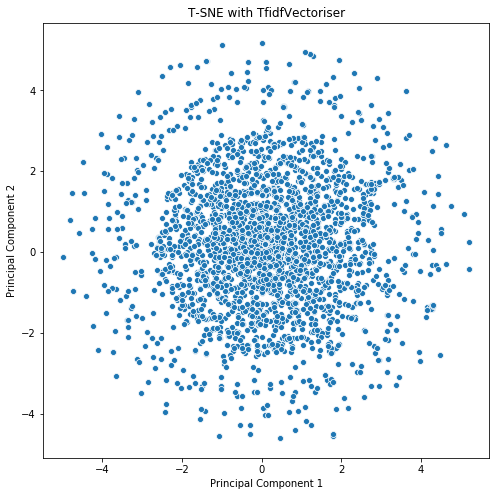

In [170]:
tsne = TSNE(n_components = 2, perplexity = 30, learning_rate = 80)
tsne_def = tsne.fit_transform(tfidf_mat.todense())
tsne_df = pd.DataFrame(tsne_def, columns = ['Principal Component 1', 'Principal Component 2'])

fig = plt.figure(figsize = (8, 8))

sns.scatterplot(
    x = 'Principal Component 1', y = 'Principal Component 2',
    data = tsne_df
).set_title('T-SNE with TfidfVectoriser')

The above is a cluster plot of the “Regular Check-In Thread” comments. My hypothesis was that these comments could be separated into either being positive or negative comments about one‟s life. I used word2vec to see the relationships between words in the comments and tfidf to cluster the comments. In regards to clustering, multiple techniques were tried including kernel PCA, MDS, and Isomap but achieved the best results using t-SNE. From the t-SNE cluster plot, we can see two clusters as a ring and as a cloud at the center. I did not look into what these clusters have in common, but being able to see the cluster structure in the “Regular Check-In Thread” commentstells us that there are two general types of comments, which is promising. For further analysis, I would distinguish what words and phrases are common in the comments in the circle compared to those in the ring. I would also perform clustering on a large amount of posts in the entire subreddit and try to see if cluster structure exists there as well.